## =============| Fake News Detection using NLP |=============
---

### Problem Statement
#### In the current digital era, misinformation and fake news spread rapidly on social media and online platforms. Identifying and filtering fake news is crucial for maintaining credible information sources.
#### I develop an NLP-based classification model to detect whether a given news article is fake or true.
---

## Importing Libraries:

In [9]:
### Basic Data-Handling:
import pandas as pd                      ## For Handling Dataset(Like CSV, Excel etc.)
import numpy as np                       ## for numerical operations and arrays.

### Text Pre-Processing:
import re                                ## For regex operation(For cleaning text)
import string                            ## For punctuation handling
import nltk                              ## Natural Language Toolkit(for stopwords, stemming etc.)
from nltk.corpus import stopwords        ## To remove common meaningless words like ex. this, the, is, it etc
from nltk.stem import PorterStemmer      ## For stemming
from nltk.stem import WordNetLemmatizer  ## For Lemmatization

### For Feature Extraction:  (Data Transformation Model)
from sklearn.feature_extraction.text import CountVectorizer     ## BOW Model
from sklearn.feature_extraction.text import TfidfVectorizer     ## TF-IDF Model

### Data Pre Processing and Model Building:
from sklearn.model_selection import train_test_split            ## Train-Test_Split
from sklearn.naive_bayes import MultinomialNB                   ## Acting as classifier for text data.
from sklearn.linear_model import LogisticRegression             ## Another good text classifier
from sklearn.svm import SVC                                     ## Support vector classifier
from sklearn.ensemble import RandomForestClassifier

### Model Evaluation:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

### Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

### Progress Bar for Loops and Apply:
from tqdm import tqdm                        ## to visually track long operations
tqdm.pandas()                                ## Enable progress_apply() in pandas

### Download nltk resources (Only need to do once).
nltk.download('stopwords')
nltk.download('wordnet')                     ## For lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAURAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GAURAV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Importing Datasets:

In [10]:
df_True = pd.read_csv(r"D:\Innomatics\ML\Assignment 1\True.csv")
df_Fake = pd.read_csv(r"D:\Innomatics\ML\Assignment 1\Fake.csv")

In [11]:
df_True.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
df_Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


---

### Adding new Column label: 
- for df_True: label values are 1.
- for df_False: label values are 0.
---

In [13]:
df_True['label'] = 1
df_Fake['label'] = 0

In [14]:
df_True.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [15]:
df_Fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


---

### Combining both DataSets:
- Combining the datasets and Shuffling it:
---

In [16]:
### Combining:
df_News = pd.concat([df_True,df_Fake],axis = 0)

In [17]:
df_News

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [18]:
### Shuffling the Data:
df_News = df_News.sample(frac = 1)

In [19]:
df_News.head()

,title,text,subject,date,label
21097,Stock futures dip after North Korea nuclear test,NEW YORK (Reuters) - U.S. equity index futures...,worldnews,"September 3, 2017",1
2641,"Many treatment options, most experimental, ava...",NEW YORK (Reuters) - There is at least one app...,politicsNews,"July 20, 2017",1
12681,U.S. envoy for North Korean affairs travels to...,WASHINGTON (Reuters) - The U.S. envoy for Nort...,worldnews,"December 8, 2017",1
20692,MUSLIM IMMIGRANT Chanted “Allahu Akbar” While ...,Was this Somali immigrant refusing to appear i...,left-news,"Apr 23, 2016",0
16854,Researchers raise doubts over cause of Chilean...,SANTIAGO (Reuters) - International researchers...,worldnews,"October 21, 2017",1


---

### EDA:
---

In [20]:
df_News['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [21]:
df_News.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [22]:
df_News.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [23]:
df_News.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 21097 to 381
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


---

In [24]:
df_News['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

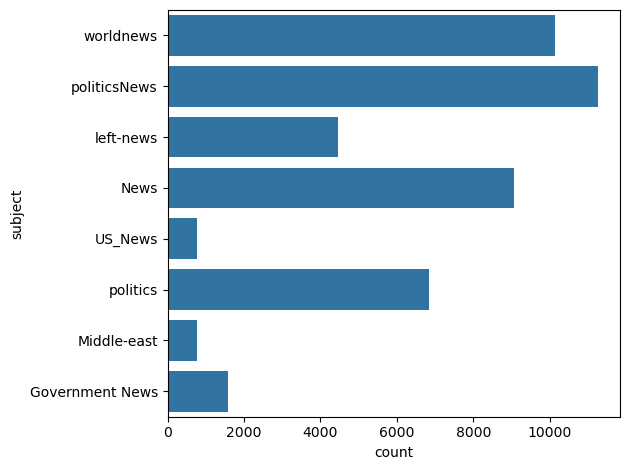

In [25]:
sns.countplot(y = 'subject',data = df_News)
plt.tight_layout()

---

### Data Preparation:

- Splitting data into Train-Test

In [26]:
## S1) Seperating data and Creating two variables: X and Y.
X = df_News[['title','text','subject','date']]
Y = df_News[['label']]

In [27]:
X.head()

,title,text,subject,date
21097,Stock futures dip after North Korea nuclear test,NEW YORK (Reuters) - U.S. equity index futures...,worldnews,"September 3, 2017"
2641,"Many treatment options, most experimental, ava...",NEW YORK (Reuters) - There is at least one app...,politicsNews,"July 20, 2017"
12681,U.S. envoy for North Korean affairs travels to...,WASHINGTON (Reuters) - The U.S. envoy for Nort...,worldnews,"December 8, 2017"
20692,MUSLIM IMMIGRANT Chanted “Allahu Akbar” While ...,Was this Somali immigrant refusing to appear i...,left-news,"Apr 23, 2016"
16854,Researchers raise doubts over cause of Chilean...,SANTIAGO (Reuters) - International researchers...,worldnews,"October 21, 2017"


In [28]:
Y.head()

,label
21097,1
2641,1
12681,1
20692,0
16854,1


In [29]:
## Train-Test-Split:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [30]:
x_train.shape

(35918, 4)

In [31]:
y_train.shape

(35918, 1)

In [32]:
x_test.shape

(8980, 4)

In [33]:
y_test.shape

(8980, 1)

### 2.1) Text Pre-Processing:

In [34]:
# for stemmer:
stemmer = PorterStemmer()

# for Lemmatizer
lemmatizer = WordNetLemmatizer()

In [35]:
def preprocess(raw_text, flag):
    # Removing special character and symbols:
    sentence = re.sub("[^a-zA-Z]"," ",raw_text)
    # Making text lower case:
    sentence = sentence.lower()
    # Tokenize words (Splitting the sentence into words):
    tokens = sentence.split()
    # Removing stop words:
    clean_tokens = [t for t in tokens if not t in stopwords.words('english')]
    # Bringing text into RootForm: 1) Stemming & 2) Lemmatization
    if (flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)])

### Applying Text-Pre-Processing on x_train:

In [36]:
### Now you can use progress_apply instead of only applying 'apply'.
temp_df_train = x_train['title'].progress_apply(lambda x: preprocess(x,'Lemma'))
temp_df_train.head()

100%|███████████████████████████████████████████████████████████████████████████| 35918/35918 [03:07<00:00, 191.23it/s]


,0,1
17774,lol photo show empty nearly empty nfl stadium ...,12
16736,dear rnc everyday american writes letter expla...,9
19931,breaking charlotte video show young white girl...,17
15980,ha ha retired marine troll liberal new yorkers...,14
639,house back billion defense policy bill funding...,8


In [37]:
x_train.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [38]:
x_train['clean_title'] = temp_df_train.iloc[:,0]

In [39]:
x_train.head()

,title,text,subject,date,clean_title
17774,LOL! PHOTOS Show EMPTY or Nearly EMPTY #NFL St...,The owners of teams where NFL players continue...,left-news,"Oct 22, 2017",lol photo show empty nearly empty nfl stadium ...
16736,DEAR RNC: An Everyday American Writes A Letter...,This letter was sent to 100% FED Up! by an ano...,Government News,"Mar 2, 2016",dear rnc everyday american writes letter expla...
19931,BREAKING CHARLOTTE: VIDEO Shows Young White Gi...,The unwarranted violence against innocent Whit...,left-news,"Sep 23, 2016",breaking charlotte video show young white girl...
15980,HA-HA! RETIRED MARINE TROLLS LIBERAL NEW YORKE...,It s always a win-win when you can find a hobb...,Government News,"Aug 9, 2017",ha ha retired marine troll liberal new yorkers...
639,"House backs $700 billion defense policy bill, ...",WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"November 14, 2017",house back billion defense policy bill funding...


In [40]:
x_train.shape

(35918, 5)

### Applying Text-Pre-Processing on x_test:

In [41]:
temp_df_test = x_test['title'].progress_apply(lambda x: preprocess(x, 'Lemma'))
temp_df_test.head()

100%|█████████████████████████████████████████████████████████████████████████████| 8980/8980 [00:44<00:00, 200.35it/s]


,0,1
3381,official fbi confirms cia finding russian hack...,9
7735,trump gain clinton despite furor woman electio...,8
8723,u official working restore public trust police...,9
13136,bwah ha ha artist brilliantly capture hillary ...,12
21989,boiler room ep mandalay massacre initial boil ...,12


In [42]:
x_test['clean_title'] = temp_df_test.iloc[:,0]

In [43]:
x_test.head()

,title,text,subject,date,clean_title
3381,IT’S OFFICIAL! The FBI Confirms CIA’s Finding...,Friday it was confirmed that the FBI is in agr...,News,"December 16, 2016",official fbi confirms cia finding russian hack...
7735,Trump gains on Clinton despite furor over wome...,NEW YORK (Reuters) - Donald Trump gained on Hi...,politicsNews,"October 21, 2016",trump gain clinton despite furor woman electio...
8723,U.S. officials working to restore public trust...,WASHINGTON (Reuters) - U.S. Attorney General L...,politicsNews,"July 18, 2016",u official working restore public trust police...
13136,BWAH-HA-HA! ARTIST BRILLIANTLY Captures Hillar...,Hillary would like American voters to believe ...,politics,"Aug 29, 2016",bwah ha ha artist brilliantly capture hillary ...
21989,Boiler Room EP #129 – Mandalay ‘Massacre:’ Ini...,Tune in to the Alternate Current Radio Network...,US_News,"October 3, 2017",boiler room ep mandalay massacre initial boil ...


In [44]:
x_test.shape

(8980, 5)

### 2.2) Feature Extraction: TF-IDF Vectorizer.

In [45]:
tfidf = TfidfVectorizer(
    max_df=0.7,                   # Ignore words that appear in more than 70% of documents.
    min_df=5,                     # Ignore words that appear in less than 5 documents.
    ngram_range=(1,2)             # 
)

X_train_tfidf = tfidf.fit_transform(x_train['clean_title'])
X_test_tfidf  = tfidf.transform(x_test['clean_title'])

### 2.3) Model Building: Multinomial Naive Bayes.

In [46]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

C:\Users\GAURAV\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

### 2.4) Predictions:

In [47]:
y_pred = nb_model.predict(X_test_tfidf)

### 3) Model Evaluation:

In [48]:
accuracy_score(y_test, y_pred)

0.9368596881959911

### 4) Classification Report:

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4662
           1       0.94      0.93      0.93      4318

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



### 5) Confusion Matrix:

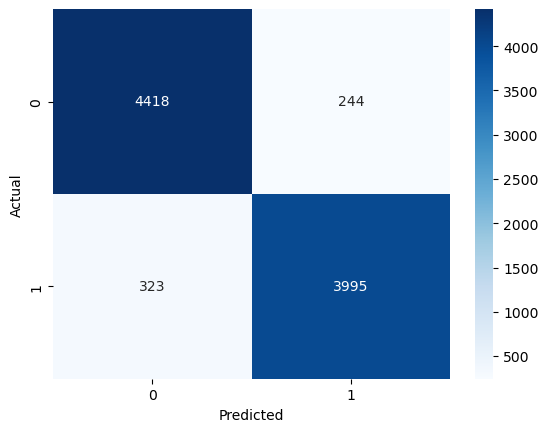

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 6) ROC Curve:

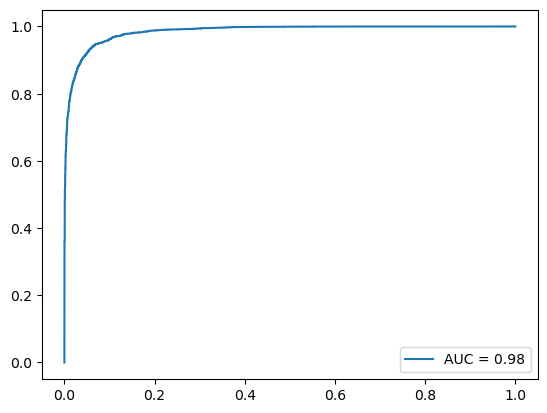

In [51]:
y_prob = nb_model.predict_proba(X_test_tfidf)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.legend()
plt.show()

### 7) Error Analysis:

In [52]:
# y_pred_series = pd.Series(y_pred, index=y_test.index)

In [53]:
# misclassified = x_test.loc[y_test != y_pred_series]
# misclassified.head()

### Final Insights:

- Naive Bayes performs well on text data

- Fake news uses emotional & sensational words

- TF-IDF improves classification accuracy

- High recall is important to catch fake news

- Model can be improved using Logistic Regression

### Using Logistic Regression:

In [54]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

C:\Users\GAURAV\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [55]:
lr_pred = lr.predict(X_test_tfidf)
accuracy_score(y_test, lr_pred)

0.9457683741648107

### Using Random Forest Classifier:

In [56]:
# rf = RandomForestClassifier(random_state = 42)
# rf.fit(X_train_tfidf,y_train.values.ravel())
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)

C:\Users\GAURAV\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [61]:
rf_pred = rf.predict(X_test_tfidf)

In [62]:
print(accuracy_score(y_test,rf_pred))

0.9396436525612473


In [63]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4662
           1       0.93      0.95      0.94      4318

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

